## Regression

### Corélation

Rappelons comment l'on calcul les coefficients de corrélation de Pearson. Au passage on calcule la matrice de covariance. 


Le coefficients de corrélation (de Pearson) entre deux variable $X$ et $Y$ mesurent la relation "linéaire":
* corr(X,Y) = 1 ssi $Y = aX+b$ avec $a > 0$. 
* corr(X,Y) = -1 ssi $Y = aX+b$ avec $a < 0$

En d'autre terme, si on considére des réalisation $(x_i,y_i)$:

* corr(X,Y) = 1 ssi $\forall i: y_i = a x_i+b$ avec $a>0$. 
* corr(X,Y) = -1 ssi $\forall i: y_i = a x_i+b$ avec $a < 0$. 


Introduisons maintenant le coefficient de corrélation de Spearman: il vérifie: 

* spear(X,Y) = 1 ssi $\forall i: y_i = f( x_i)$ avec $f$ croissante. 
* spear(X,Y) = -1 ssi $\forall i: y_i = f(x_i)$ avec $f$ décroissante.

Spearman c'est tout simplement Pearson que l'on calcule à partir du rang des réalisations (et non des réalisation elles même). 

Observons ce calcul.  

###  Standarisation

Notons que beaucoup d'histogramme ont des "queues lourdes" (=heavy-tail). Les algos préfèrent les distributions en cloche de Gauss. On effectuera quelques prétraitements pour arranger cela. 

Tous les modèles (à l'exception du modèle linéaire) on besoin d'avoir en entrée des valeurs numérique ni trop grandes ni trop petites. Il faut donc effectuer un scaling (=changement d'échelle).


Observons tout d'abord l'étendue des valeurs avec des boites à moustaches (=box-plot)


1

La méthode de scaling la plus classique est la standardisation: on soustrait à chaque variable numérique sa moyenne puis on  divise par l'écart-type. 

Il est habituel de 'fiter' le scaler sur les données train uniquement: on calcule moyennes et les écarts-types sur train. Ensuite on centre-réduit train et test avec ces moyennes et écart types. 


L'autre solution serait de centrer-réduire train et test indépendamment avec leur propre moyennes et écart-type. Mais il faut imaginer que les données test peuvent arriver à posteriori et être très petites (ex: 2 lignes). Cela n'a pas de sens de calculer une moyenne et un écart type dessus.  


Cependant cette règle peu connaitre des exceptions. Par exemple: les jeux de données arrivent par paquets, et proviennent d'appareils dont le qualibrage change avec le temps. Dans ce cas, il est naturel de centrer-réduire systèmatiquement les paquets de données. 

2


* Avantage du min-max scaler: Cela aide certains algo d'avoir des valeurs toutes dans le même intervalle.
* Incovénient du min-max scaler: Si il y a des valeurs extrèmes, elles vont écraser les autres valeurs. 

Conseil: utiliser un min-max scaleur uniquement pour des valeurs numériques dont l'échelle est bien déterminée. Ex: la valeur d'un pixel entre 0 et 255.

###Sur-apprentissage (sur-ajustement, overfitting)


En ajustant trop un modèle aux données train, ce modèle ne pourra pas se généraliser à d'autres données. 

Reprenons notre problème de modèlisation de la Life-satisfaction. Voici un modèle qui pourrait parfaitement s'adapter aux données train: 
$$
\hat Y = f_w(X) = w_0 +w_1 X+ w_2 X^2 + ... + w_{20} X^{20}
$$
On ajuste ce modèles, c'est a dire, on trouve les coefficients $w$ qui minimisent 
$$
\sum_{i \in train} dist\big(Y_i,f_w(X_i)\big)
$$

Mais peut-on avoir confiance en un tel modèle pour prédire?



Des modèles complexes, comme les réseaux de neurones profonds, peuvent détecter des motifs subtils dans les données train, mais si ces motifs proviennent du bruit (ex: bruit d'échantillonnage) ce n'est pas bon. 

###  Sous-ajustement

C'est l'opposé sur sur-ajustement. Cela arrive quand le modèle est trop simplent pour apprendre la structure sous-jacente des données. C'est le cas du modèle affine pour la life-satisfaction. 

Quand cela arrive, les options sont: 
* Choisir un meilleurs modèle: plus flexible
* Sélectionner de meilleurs descripteurs
* Réduire le coefficient de pénalisation

## Elastic Net

### Contraindre un modèle par la régularisation

L'overfitting vient quand le modèle est trop complexe. Pour limiter cela, les solutions sont: 

* Sélectionner un modèle avec moins de paramétre: ex: un modèle linéaire plutôt qu'un modèle polynomial de haut degré. MAIS: on risque de tomber dans le sous-ajustement. 
* Supprimer des descripteurs inutiles. MAIS pas facile à savoir à l'avance. 
* Augmenter le nombre de données train. MAIS en général on utilise toutes les données dont on dispose. 
* Bien nettoyer ses données. MAIS on l'a déjà fait car on est sérieux. 


Il existe une solution supplémentaire: la pénalisation: On garde un modèle avec beaucoup de paramètre, mais on oblige les paramètres à être assez petit. Pour cela on va trouver le $w$ qui va minimiser 

$$
\sum_{i \in train} dist\big(Y_i,f_w(X_i)\big) + \alpha \|w\|
$$

$\alpha$ est un coef positif, et le plus souvent on chosi l'une des deux pénalité suivantes:

* $\|w\|= |w_1| + ...+ |w_{20}| $. On parle de pénalité lasso. 
* $\|w\|= (w_1)^2 + ...+ (w_{20})^2 $. On parle de pénalité ridge.

Ainsi on laisse beaucoup de degré de liberté au modèle, mais, lors de l'apprentissage, on lui demande de trouver le bon équilibre entre:

* le bon ajustement aux données train
* la simplicité

Cela aide à la généralisation. 

Durant l'apprentissage on pénalise les valeurs extêmes des paramètres, car ces valeurs correspondent souvent à un surapprentissage.

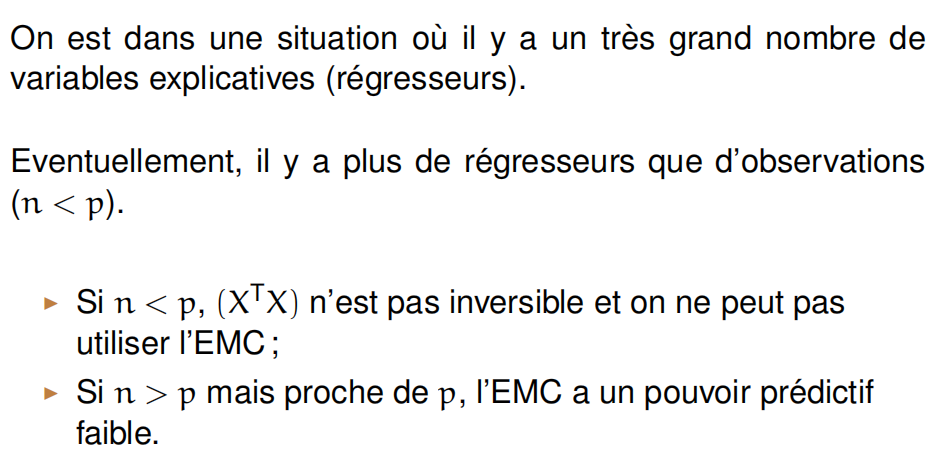

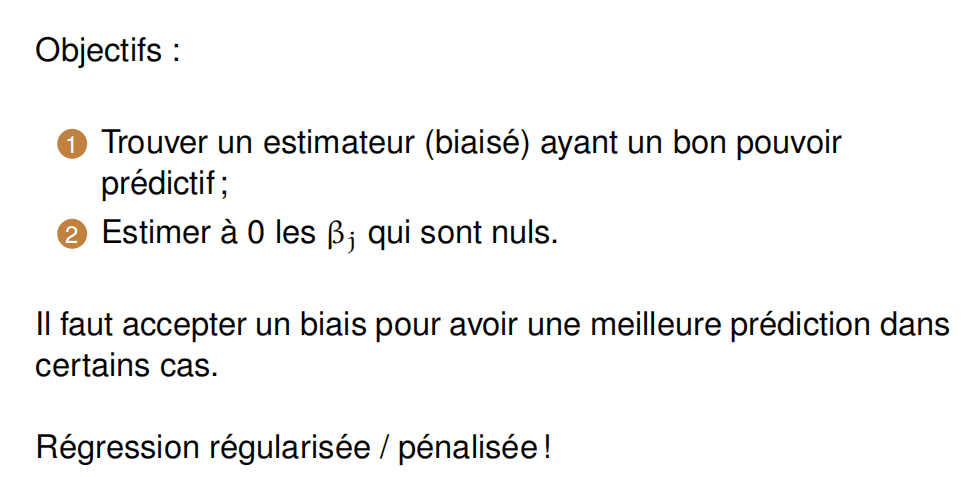

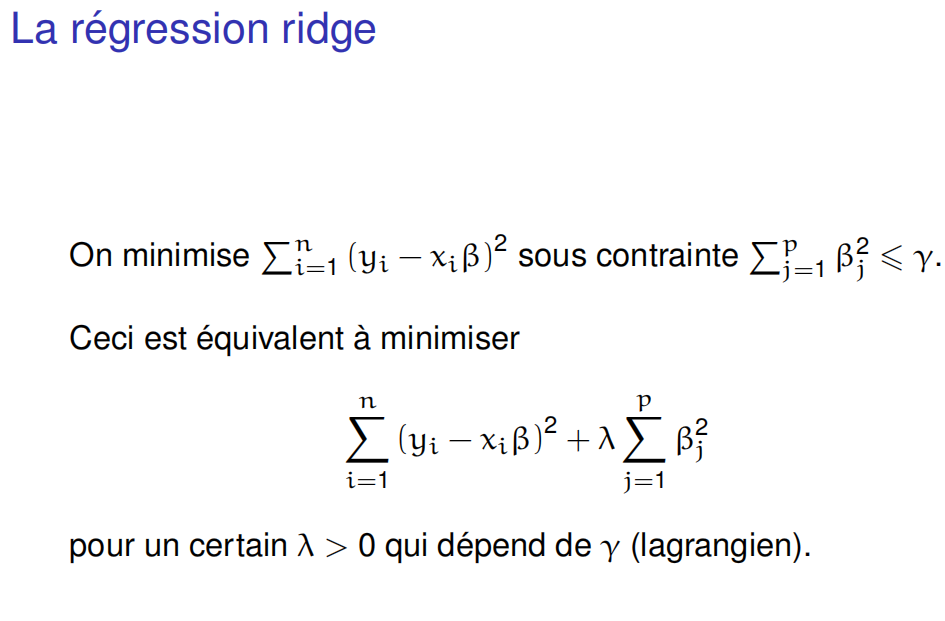

This article was published as a part of the Data Science Blogathon

Introduction
One of the most common problems every Data Science practitioner faces is Overfitting. Have you tackled the situation where your machine learning model performed exceptionally well on the train data but was not able to predict on the unseen data or you were on the top of the competition in the public leaderboard, but your ranking drops by hundreds of places in the final rankings?

Well – this is the article for you!

Avoiding overfitting can single-handedly improve our model’s performance.

In this article, we will understand how regularization helps in overcoming the problem of overfitting and also increases the model interpretability.

This article is written under the assumption that you have a basic understanding of Regression models including Simple and Multiple linear regression, etc.

Loading Image
Become a Full-Stack Data Scientist
Power Ahead in your AI ML Career | No Pre-requisites Required
Table of Contents
👉 Why Regularization?
👉 What is Regularization?
👉 How does Regularization work?
👉 Techniques of Regularization
Ridge Regression
Lasso Regression
👉 Key differences between Ridge and Lasso Regression
👉 Mathematical Formulation of Regularization Techniques
👉 What does Regularization Achieve?
Why Regularization?
Sometimes what happens is that our Machine learning model performs well on the training data but does not perform well on the unseen or test data. It means the model is not able to predict the output or target column for the unseen data by introducing noise in the output, and hence the model is called an overfitted model.

Let’s understand the meaning of “Noise” in a brief manner:

By noise we mean those data points in the dataset which don’t really represent the true properties of your data, but only due to a random chance.

So, to deal with the problem of overfitting we take the help of regularization techniques.

What is Regularization?
👉 It is one of the most important concepts of machine learning. This technique prevents the model from overfitting by adding extra                      information to it.
👉 It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique forces us not to learn a more            complex or flexible model, to avoid the problem of overfitting.
👉 Now, let’s understand the “How flexibility of a model is represented?”
    For regression problems, the increase in flexibility of a model is represented by an increase in its coefficients, which are calculated              from the regression line.
👉 In simple words, “In the Regularization technique, we reduce the magnitude of the independent variables by keeping the same                number of variables”. It maintains accuracy as well as a generalization of the model.
How does Regularization Work?
Regularization works by adding a penalty or complexity term or shrinkage term with Residual Sum of Squares (RSS) to the complex model.


Ridge Regression
 

👉 Ridge regression is one of the types of linear regression in which we introduce a small amount of bias, known as Ridge regression penalty so that we can get better long-term predictions.


 

👉 Usage of Ridge Regression:

When we have the independent variables which are having high collinearity (problem of ) between them, at that time general linear or polynomial regression will fail so to solve such problems, Ridge regression can be used.
If we have more parameters than the samples, then Ridge regression helps to solve the problems.

Limitation of Ridge Regression:

 

Not helps in Feature Selection: It decreases the complexity of a model but does not reduce the number of independent variables since it never leads to a coefficient being zero rather only minimizes it. Hence, this technique is not good for feature selection.
Model Interpretability: Its disadvantage is model interpretability since it will shrink the coefficients for least important predictors, very close to zero but it will never make them exactly zero. In other words, the final model will include all the independent variables, also known as predictors.

In this technique, the L1 penalty has the eﬀect of forcing some of the coeﬃcient estimates to be exactly equal to zero which means there is a complete removal of some of the features for model evaluation when the tuning parameter λ is suﬃciently large. Therefore, the lasso method also performs Feature selection and is said to yield sparse models.